# 1. Add all possible optimzation flags

In [506]:
BASE_FLAGS = ["-O1","-O2","-O3"]
OPT_FLAGS = [
    "-fauto-inc-dec",
    "-fbranch-count-reg",
    "-fcombine-stack-adjustments",
    "-fcompare-elim",
    "-fcprop-registers",
    "-fdce",
    "-fdefer-pop",
    "-fdelayed-branch",
    "-fdse",
    "-fforward-propagate",
    "-fguess-branch-probability",
    "-fif-conversion",
    "-fif-conversion2",
    "-finline-functions-called-once",
    "-fipa-profile",
    "-fipa-pure-const",
    "-fipa-reference",
    "-fmerge-constants",
    "-fmove-loop-invariants",
    "-fomit-frame-pointer",
    "-freorder-blocks",
    "-fshrink-wrap",
    "-fsplit-wide-types",
    "-fssa-phiopt",
    "-ftree-bit-ccp",
    "-ftree-ccp",
    "-ftree-ch",
    "-ftree-coalesce-vars",
    "-ftree-copy-prop",
    "-ftree-dce",
    "-ftree-dominator-opts",
    "-ftree-dse",
    "-ftree-forwprop",
    "-ftree-fre",
    "-ftree-phiprop",
    "-ftree-pta",
    "-ftree-scev-cprop",
    "-ftree-sink",
    "-ftree-slsr",
    "-ftree-sra",
    "-ftree-ter",
    "-funit-at-a-time",


    "-falign-functions", 
    "-falign-jumps",
    "-falign-labels", 
    "-falign-loops",
    "-fcaller-saves",
    "-fcrossjumping",
    "-fcse-follow-jumps" , 
    "-fcse-skip-blocks",
    "-fdelete-null-pointer-checks",
    "-fdevirtualize" , 
    "-fdevirtualize-speculatively",
    "-fexpensive-optimizations",
    "-fgcse",
    "-fgcse-lm",
    "-fhoist-adjacent-loads",
    "-finline-functions",
    "-finline-small-functions",
    "-findirect-inlining",
    "-fipa-cp", 
    "-fipa-icf",
    "-fipa-ra",
    "-fipa-sra",
    "-fisolate-erroneous-paths-dereference",
    "-flra-remat",
    "-foptimize-sibling-calls",
    "-foptimize-strlen",
    "-fpartial-inlining",
    "-fpeephole2",
    "-freorder-blocks-and-partition",
    "-freorder-functions",
    "-frerun-cse-after-loop",
    "-fschedule-insns",
    "-fschedule-insns2",
    "-fsched-interblock", 
    "-fsched-spec",
    "-fstrict-aliasing",
    "-fthread-jumps",
    "-ftree-builtin-call-dce",
    "-ftree-pre",
    "-ftree-switch-conversion",
    "-ftree-tail-merge",
    "-ftree-vrp",

    
    "-fgcse-after-reload",
    "-fipa-cp-clone",
    "-floop-interchange",
    "-floop-unroll-and-jam",
    "-fpeel-loops",
    "-fpredictive-commoning",
    "-ftree-loop-distribution",
    "-ftree-loop-vectorize",
    "-ftree-partial-pre",
    "-ftree-slp-vectorize",
    "-funswitch-loops",
    "-fvect-cost-model",
    "-fvect-cost-model=dynamic",

    
    "-falign-functions",
    "-falign-jumps",
    "-falign-labels",
    "-falign-loops",
    "-fprefetch-loop-arrays",


    "-fbranch-count-reg",
    "-fdelayed-branch",
    "-fdse",
    "-fif-conversion",
    "-fif-conversion2",
    "-finline-functions-called-once",
    "-fmove-loop-invariants",
    "-fssa-phiopt",
    "-ftree-bit-ccp",
    "-ftree-dse",
    "-ftree-pta",
    "-ftree-sra"
]

In [1030]:
len(OPT_FLAGS)

114

# Take sample dataset from 10 codes.

In [785]:
# Take sample dataset from 10 codes.

import os
c_files = []

for file in os.listdir("./benchmarks/"):
    if file.endswith(".c"):
        c_files.append(os.path.join("./benchmarks", file))

import string

def randomString(stringLength=8):
    letters = string.ascii_lowercase + string.digits
    return ''.join(random.choice(letters) for i in range(stringLength))

c_files = [c_files[4], c_files[7]] 
c_files

['./benchmarks/mat1bench.c', './benchmarks/evobench.c']

# Calculate for random flag selection

In [ ]:
import random
import time
import subprocess as sp
rounds = 5

rand_ct = []
rand_et = []

while rounds:
    rounds = rounds - 1
    
    try: os.mkdir("./benchmarks/executables/")
    except: pass
    
    total_ct = 0
    total_et = 0

    for i, cfile in enumerate(c_files):
        outfile = randomString() + ".out"
        cmdBuild = ["gcc"] + random.sample(OPT_FLAGS, random.randint(5, 40)) +  [cfile, "-o", "./benchmarks/executables/" + outfile, "-lm"]
        tick = time.time()
        p = sp.call(cmdBuild)
        tock = time.time()
        total_ct += (tock-tick)*1000
        
        tick = time.time()
        p = sp.call(["./benchmarks/executables/" + outfile])
        tock = time.time()
#         print(tock-tick)

        os.remove("./benchmarks/executables/" + outfile)
        total_et += (tock-tick)*1000
        
    rand_ct.append(total_ct)
    rand_et.append(total_et)


print(rand_ct, rand_et)

# Defining problem for MultiObjective Genetic algorithm

In [771]:
from platypus import GeneticAlgorithm, Problem, Constraint, Binary, nondominated, unique, SPEA2, Real
import time
import subprocess as sp
import os

items = len(OPT_FLAGS)

def gcc_compilation(x):
    # 1st objective
    selection = x[0]

    total_ct = 0
    total_et = 0
    
    for i, cfile in enumerate(c_files):
        flags = []
        for i in  range(items):
            if selection[i]:
                flags.append(OPT_FLAGS[i])
        try:
            outfile = randomString() + ".out"

            cmdBuild = ["gcc"] + flags + [cfile, "-o", "./benchmarks/executables/" + outfile, "-lm"]
            tick = time.time()
            p = sp.call(cmdBuild)
            tock = time.time()
            total_ct += tock-tick

            cmd = ["./benchmarks/executables/" + outfile]
            tick = time.time()
            p = sp.call(cmd)
            tock = time.time()
            os.remove("./benchmarks/executables/" + outfile)
            total_et += tock-tick
        except Exception as e:
            print("Exception found", e)
            return 100000, 100000
    # 3rd objective
    #     t3 = os.stat('./a.out').st_size
    return total_ct, total_et

problem = Problem(1, 2)
problem.types[0] = Binary(items)
# problem.types[:] = [Binary(len(OPT_FLAGS)), Binary(len(OPT_FLAGS))]
problem.directions[:] = Problem.MINIMIZE #all objective mininmize
problem.constraints[:] = Constraint(">", 0)
problem.function = gcc_compilation


# SPEA2 optization algorithm runner

In [ ]:
algorithm = SPEA2(problem)
algorithm.run(5000)

In [ ]:
for solution in unique(nondominated(algorithm.result)):
    print(solution.objectives)
    print(solution.variables)

# NSGAII optimzation algorithm runner

In [645]:
from platypus import NSGAII

algorithm2 = NSGAII(problem)
algorithm2.run(5000)

In [ ]:
for solution in unique(nondominated(algorithm2.result)):
    print(solution)

# MOEA/D optimzation algorithm runner

In [646]:
from platypus import MOEAD

algorithm4 = MOEAD(problem)
algorithm4.run(5000)

In [ ]:
for solution in unique(nondominated(algorithm4.result)):
    print(solution)

In [668]:
def avg(num):
    sumOfNumbers = 0
    for t in num:
        sumOfNumbers = sumOfNumbers + t

    avge = sumOfNumbers / len(num)
    return avge

-O0
No optimization (the default); generates unoptimized code but has the fastest compilation time.

Note that many other compilers do substantial optimization even if ’no optimization’ is specified. With gcc, it is very unusual to use -O0 for production if execution time is of any concern, since -O0 means (almost) no optimization. This difference between gcc and other compilers should be kept in mind when doing performance comparisons.

*
-O1
Moderate optimization; optimizes reasonably well but does not degrade compilation time significantly.

*
-O2
Full optimization; generates highly optimized code and has the slowest compilation time.

*
-O3
Full optimization as in -O2; also uses more aggressive automatic inlining of subprograms within a unit (Inlining of Subprograms) and attempts to vectorize loops.

*
-Os
Optimize space usage (code and data) of resulting program.

# Runing standard optimzations O0,O1,O2,O3

In [ ]:
import subprocess as sp
import random
import time
o_ct = {
    "O0": [],
    "O1": [],
    "O2": [],
    "O3": [],
}
o_et = {
    "O0": [],
    "O1": [],
    "O2": [],
    "O3": [],
}
import time

for i in range(3, -1, -1):

    iters = 1
    while iters:
        iters = iters - 1
        total_ct = 0
        total_et = 0
        for j, cfile in enumerate(c_files):
            outfile = randomString() + ".out"
            cmdBuild = ["gcc", "-O" + str(i), cfile, "-o", "./benchmarks/executables/" + outfile, "-lm"]
            tick = time.time()
            p = sp.call(cmdBuild)

            tock = time.time()
            total_ct += (tock-tick)*1000

            cmd = ["./benchmarks/executables/" + outfile]
            tick = time.time()
            p = sp.call(cmd)
            tock = time.time()
            total_et += (tock-tick)*1000
            os.remove("./benchmarks/executables/" + outfile)

        o_ct["O" + str(i)].append(total_ct)
        o_et["O" + str(i)].append(total_et)

    print("-O{}  Compilation time: {}ms, Execution time: {}ms".format(i, avg(o_ct["O" + str(i)]), avg(o_et["O" + str(i)])))


# Consolidating results

In [ ]:
spea_ct = []
spea_et = []

for solution in unique(nondominated(algorithm.result)):
    spea_ct.append(list(solution.objectives)[0]*1000)
    spea_et.append(list(solution.objectives)[1]*1000)
spea_ct, spea_et

In [ ]:
nsga_ct = []
nsga_et = []

for solution in unique(nondominated(algorithm2.result)):
    nsga_ct.append(list(solution.objectives)[0]*1000)
    nsga_et.append(list(solution.objectives)[1]*1000)
nsga_ct, nsga_et

In [ ]:
moead_ct = []
moead_et = []

for solution in unique(nondominated(algorithm4.result)):
    moead_ct.append(list(solution.objectives)[0]*1000)
    moead_et.append(list(solution.objectives)[1]*1000)
moead_ct, moead_et

# Comparision of Compilation and Execution time \n of various compiler optimization approaches

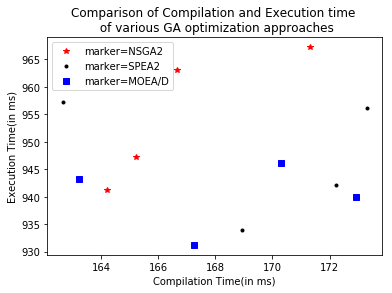

In [1010]:
# plt.plot(paes_ct, paes_et, "y>")
plt.plot(nsga_ct, nsga_et, "r*",  label="marker=NSGA2")
plt.plot(spea_ct, spea_et, "k.", label="marker=SPEA2")
plt.plot(moead_ct, moead_et, "bs",  label="marker=MOEA/D")

plt.xlabel("Compilation Time(in ms)")
plt.ylabel("Execution Time(in ms)")
plt.title("Comparison of Compilation and Execution time \n of various GA optimization approaches")
plt.legend(numpoints=1)
plt.show()

# Comparision of Compilation and Execution time \n of various compiler optimization approaches

Text(0.5, 1.0, 'Comparision of Compilation and Execution time \n of various compiler optimization approaches')

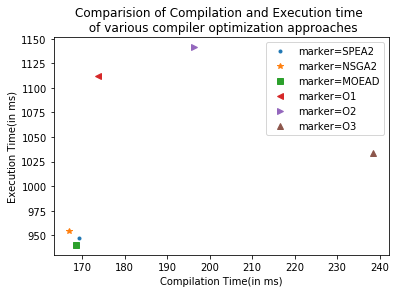

In [1011]:
# for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
plt.plot([avg(spea_ct),], [avg(spea_et),], '.',
         label="marker=SPEA2")

plt.plot([avg(nsga_ct),], [avg(nsga_et),], '*',
         label="marker=NSGA2")

plt.plot([avg(moead_ct),], [avg(moead_et),], 's',
         label="marker=MOEAD")

# plt.plot([avg(paes_ct),], [avg(paes_et),], 'v',
#          label="marker=PAES")

# plt.plot([avg(o_et["O0"]),], [avg(o_et["O0"]),], '.',
#          label="marker=O0")

plt.plot([avg(o_ct["O1"]),], [avg(o_et["O1"]),], '<',
         label="marker=O1")

plt.plot([avg(o_ct["O2"])], [avg(o_et["O2"]),], '>',
         label="marker=O2")

plt.plot([avg(o_ct["O3"]),], [avg(o_et["O3"]),], '^',
         label="marker=O3")


# plt.plot([avg(rand_ct),], [avg(rand_et),], 's',
#          label="marker=Random")

plt.legend(numpoints=1)
# plt.xlim(0, 50);
plt.xlabel("Compilation Time(in ms)")
plt.ylabel("Execution Time(in ms)")
plt.title("Comparision of Compilation and Execution time \n of various compiler optimization approaches")

# Hypervolume

In [ ]:
from platypus import Hypervolume, experiment, calculate, display

hyp = Hypervolume(minimum=[0, 0, 0], maximum=[1, 1, 1])
hyp_result = calculate(results, hyp)
display(hyp_result, ndigits=5)

print(hyp_result)

# Compilation and Execution time of Optimization levels

<Figure size 432x288 with 0 Axes>

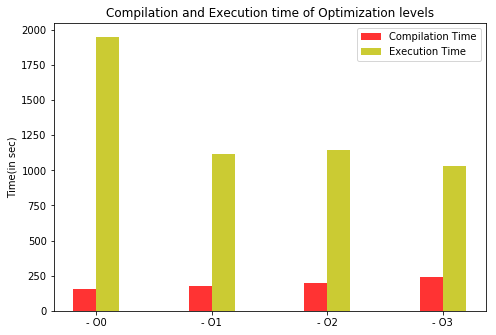

In [1012]:
import matplotlib.pyplot as plt
import numpy as np
import collections
fig = plt.figure()

X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

oo_ct = []
oo_et = []
for key in sorted(o_ct):
    oo_ct.append(o_ct[key][0])
for key in sorted(o_et):
    oo_et.append(o_et[key][0])
  
ax.bar(X + 0.00, oo_ct, color = 'r', width = 0.2, label = "Compilation Time", alpha = 0.8)
ax.bar(X + 0.2, oo_et, color = 'y', width = 0.2, label = "Execution Time", alpha = 0.8)

plt.xlabel("")
plt.ylabel("Time(in sec)")
plt.title('Compilation and Execution time of Optimization levels')
plt.xticks(X + 0.1, ('- O0', '- O1', '- O2', '- O3'))

plt.legend()

plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

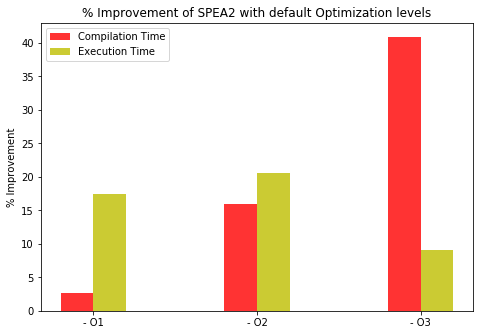

In [1024]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()

speedup_spea_ct = []
speedup_spea_et = []

for i in oo_ct[1:]:
    speedup_spea_ct.append( (i-avg(spea_ct))*100/avg(spea_ct) )

for i in oo_et[1:]:
    speedup_spea_et.append( (i-avg(spea_et))*100/avg(spea_et) )

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, speedup_spea_ct, color = 'r', width = 0.2, label = "Compilation Time", alpha = 0.8)
ax.bar(X + 0.2, speedup_spea_et, color = 'y', width = 0.2, label = "Execution Time", alpha = 0.8)

plt.xlabel("")
plt.ylabel("% Improvement")
plt.title('% Improvement of SPEA2 with default Optimization levels')
plt.xticks(X + 0.1, ('- O1', '- O2', '- O3'))

plt.legend()

plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

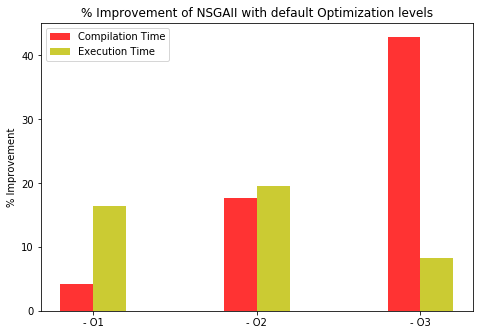

In [1027]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()

speedup_nsga_ct = []
speedup_nsga_et = []

for i in oo_ct[1:]:
    speedup_nsga_ct.append( (i-avg(nsga_ct))*100/avg(nsga_ct) )

for i in oo_et[1:]:
    speedup_nsga_et.append( (i-avg(nsga_et))*100/avg(nsga_et) )

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, speedup_nsga_ct, color = 'r', width = 0.2, label = "Compilation Time", alpha = 0.8)
ax.bar(X + 0.2, speedup_nsga_et, color = 'y', width = 0.2, label = "Execution Time", alpha = 0.8)

plt.xlabel("")
plt.ylabel("% Improvement")
plt.title('% Improvement of NSGAII with default Optimization levels')
plt.xticks(X + 0.1, ('- O1', '- O2', '- O3'))

plt.legend()

plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

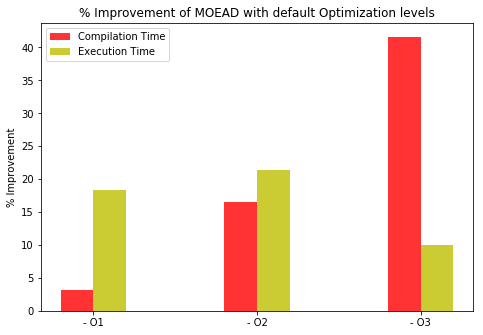

In [1029]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()

speedup_moead_ct = []
speedup_moead_et = []

for i in oo_ct[1:]:
    speedup_moead_ct.append( (i-avg(moead_ct))*100/avg(moead_ct) )

for i in oo_et[1:]:
    speedup_moead_et.append( (i-avg(moead_et))*100/avg(moead_et) )

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, speedup_moead_ct, color = 'r', width = 0.2, label = "Compilation Time", alpha = 0.8)
ax.bar(X + 0.2, speedup_moead_et, color = 'y', width = 0.2, label = "Execution Time", alpha = 0.8)

plt.xlabel("")
plt.ylabel("% Improvement")
plt.title('% Improvement of MOEAD with default Optimization levels')
plt.xticks(X + 0.1, ( '- O1', '- O2', '- O3'))

plt.legend()

plt.tight_layout()
plt.show()